In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set()

%matplotlib inline

In [2]:
df = pd.read_csv("diabetes_clean.csv")
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:xlabel='diabetes', ylabel='count'>

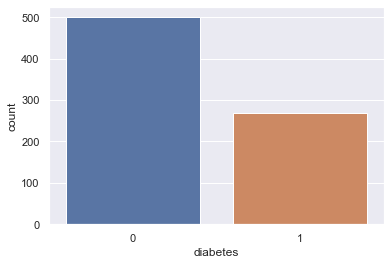

In [3]:
sns.countplot(data=df, x='diabetes')

# Evaluate Model Performance

In [4]:
# Create data features and labels
X = df.drop("diabetes", axis=1).values
y = df['diabetes'].values


# Split data into training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [5]:
# Import confusion matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

knn = KNeighborsClassifier(n_neighbors=6)

# Fit the model to the training data
knn.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[124  27]
 [ 42  38]]
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       151
           1       0.58      0.47      0.52        80

    accuracy                           0.70       231
   macro avg       0.67      0.65      0.65       231
weighted avg       0.69      0.70      0.69       231



In [6]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(max_iter=1000) #data scaled
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [7]:
# Extract the probabilities given to each prediction
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

In [8]:
df_pob = pd.DataFrame(logreg.predict_proba(X_test), columns=['d','b'])
df_pob.sort_values(by='d', ascending=False).head()

,d,b
92,0.997067,0.002933
196,0.996484,0.003516
57,0.996044,0.003956
154,0.995637,0.004363
139,0.988619,0.011381


In [10]:
# https://machinelearningmastery.com/threshold-moving-for-imbalanced-classification/abs

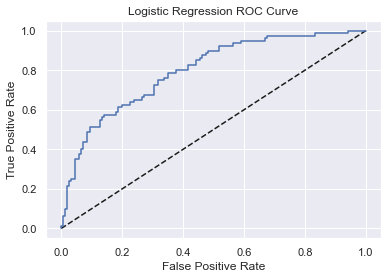

In [11]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1],'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()

In [12]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))

0.796523178807947


# Hyperparameter Tuning

In [13]:
# Create regression data
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:
X = df.drop("glucose", axis=1).values
y = df["glucose"].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [17]:
# import libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import Ridge


kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {"alpha": np.arange(0.0001, 1, 10),"solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg']}
ridge = Ridge()
ridge_cv = GridSearchCV(ridge, param_grid, cv=kf)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'alpha': 0.0001, 'solver': 'sparse_cg'} 0.335154173330123


In [18]:
from sklearn.model_selection import RandomizedSearchCV
kf = KFold(n_splits=5, shuffle=True, random_state=42)
param_grid = {'alpha': np.arange(0.0001, 1, 10),"solver": ['svd', 'cholesky', 'lsqr', 'sparse_cg']}
ridge = Ridge()
ridge_cv = RandomizedSearchCV(ridge, param_grid, cv=kf, n_iter=2)
ridge_cv.fit(X_train, y_train)
print(ridge_cv.best_params_, ridge_cv.best_score_)

{'solver': 'svd', 'alpha': 0.0001} 0.335063597265549


In [19]:
# Randomized search for Knearest neighbors
df.head()

,pregnancies,glucose,diastolic,triceps,insulin,bmi,dpf,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
# Create the target and the features
X = df.drop('diabetes', axis=1).values
y = df['diabetes'].values

In [21]:
# split data into training and test set
from sklearn.model_selection import train_test_split

# actual split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=True)

In [22]:
# create our Kneighbor
from sklearn.neighbors import KNeighborsClassifier
# instantiate the model
model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', leaf_size=24)

# fit model to training data
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7677165354330708

In [23]:
# create confusion matrix
from sklearn.metrics import confusion_matrix, classification_report

# lets get the results
confusion_matrix(y_test, y_pred)

array([[143,  19],
       [ 40,  52]], dtype=int64)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       162
           1       0.73      0.57      0.64        92

    accuracy                           0.77       254
   macro avg       0.76      0.72      0.73       254
weighted avg       0.76      0.77      0.76       254



In [30]:
## Hyperpameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

# create folds
folds = KFold(n_splits=2, random_state=None, shuffle=False)

param_grid = {
    "n_neighbors": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "metric": ['minkowski', 'Manhattan', 'euclidean'],
    "leaf_size": [24,30,35,40,45]
}

knn = KNeighborsClassifier()

random_model = RandomizedSearchCV(knn, param_grid, cv=folds)
# fit the mode
random_model.fit(X_train, y_train)
random_model.best_params_

C:\Users\Joseph\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
4 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Joseph\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Joseph\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py", line 198, in fit
    return self._fit(X, y)
  File "C:\Users\Joseph\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "C:\Users\Joseph\anaconda3\lib\sit

{'n_neighbors': 6, 'metric': 'minkowski', 'leaf_size': 30}